In [1]:
import sympy as sy
from sympy.physics.vector import ReferenceFrame,dynamicsymbols
from sympy.physics.vector import Point

import IPython
from IPython.display import display

import matplotlib.pyplot as plt

import numpy as np

import scipy

def displayH(a1,a2='', a3='', a4='', a5='', a6='', a7='',):
    latex_a1 = sy.latex(a1)
    latex_a2 = sy.latex(a2)
    latex_a3 = sy.latex(a3)
    latex_a4 = sy.latex(a4)
    latex_a5 = sy.latex(a5)
    latex_a6 = sy.latex(a6)
    latex_a7 = sy.latex(a7)
    display( IPython.core.display.Math(latex_a1 + latex_a2 + latex_a3 + latex_a4 + latex_a5 + latex_a6 + latex_a7)  )

## 1. Particle dynamics
Consider a particle of mass m moving in a horizontal plane as shown in the figure. The particle is attached to a linear spring with spring constant k and unstretched length l. Assume no gravity.
Perform the following tasks:
#### 1. Derive the equations of motion for all degrees of freedom of the system.

##### Solution:

$$
\vec{r} = r\hat{e}_{r} \\
\vec{v} = \frac{^N d \vec{r}}{dt} = \frac{^E d \vec{r}}{dt} + \omega \times \vec{r}
= \dot{r}\hat{e}_{r}+r\dot{\theta}\hat{e}_{\theta} \\
\vec{a} = \frac{^N d \vec{v}}{dt} = \frac{^E d \vec{v}}{dt} + \omega \times \vec{v}
= \left(\ddot{r}-r\dot{\theta}^{2}\right)\hat{e}_{r}+\left(2\dot{r}\dot{\theta}+r\ddot{\theta}\right)\hat{e}_{\theta} \\
\vec{F} = -k(r-l)
$$

Equations of Motion:

$$
\begin{align*}
&\hat{e}_{r}: m(\ddot{r}-r\dot{\theta}^{2}) = -k(r-l) \\
&\hat{e}_{\theta}: m(2\dot{r}\dot{\theta}+r\ddot{\theta}) = 0 \\
&\hat{e}_{z}: 0 = 0
\end{align*} 
$$

In [2]:
theta = dynamicsymbols("theta")
R = dynamicsymbols("r")

m = sy.Symbol("m")
k = sy.Symbol("k")
l = sy.Symbol("l")
t = sy.Symbol("t")

# Define inrtl reference frame (sun)
N = ReferenceFrame('N')
O = Point('O')
# Define intermediate reference frame (earth) rotated about N.z by phi
E = N.orientnew('E','Axis',[theta,N.z])

r = O.locatenew("pos_moon",R*E.x).pos_from(O)
v = sy.diff(r,t,N)
a = sy.diff(v,t,N)

F = -k*(R-l)*E.x

displayH(sy.Symbol(r"\vec{r} ="),r)
displayH(sy.Symbol(r"\vec{v} ="),v.express(E).simplify())
displayH(sy.Symbol(r"\vec{a} ="),a.express(E).simplify())

displayH(sy.Symbol(r"\vec{F} ="),F.express(E).simplify())
displayH(sy.Matrix([sy.Symbol(r"\vec{e}_{r}"),sy.Symbol(r"\vec{e}_{\theta}"),sy.Symbol(r"\vec{e}_{z}")]),sy.Symbol(r"\rightarrow"),a.to_matrix(E).simplify(),"=",F.to_matrix(E).simplify())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### 2. What is the angular momentum of the mass about point O. Is it conserved? Prove this mathematically.

##### Solution:

$$
\vec{H}_{O} = \vec{r} \times m \vec{\dot{r}} = mr^{2}\dot{\theta}\hat{e}_{z}
$$

$$
\vec{\dot{H}}_{O} = \frac{d \vec{H}_{O}}{dt} = mr\left(2\dot{r}\dot{\theta}+r\ddot{\theta}\right)\hat{e}_{z}
$$

Using the Equations of Motion ($\hat{e}_{\theta}$), we can simplify this expression to a trivial expression.

$$
\vec{\dot{H}}_{O}=0
$$

With the rate of change of angular momentum being zero, we know that angular momentum is conserved.

In [3]:
omega = E.ang_vel_in(N)

H_O = r.cross(m*v)
Hprime_O = sy.diff(H_O,t,N)

displayH(sy.Symbol(r"\vec{H}_{O} ="),H_O.express(E).simplify())
displayH(sy.Symbol(r"\vec{\dot{H}}_{O} ="),Hprime_O.express(E).simplify())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### 3. Is the total energy of the system conserved? Answer ”yes” or ”no” and explain your reasoning.

##### Solution:
Yes! The total energy of the system is conserved because the only force acting on this system is a spring force, which is a conservative force. As the system moves, the system's energy is traded between Kinetic Energy and Spring Potential Energy.

## 2. Moment of Inertia.

The moment of inertia matrix in the current coordinate frame is, 
$$I = \begin{bmatrix}
3 & 1 & 1 \\
1 & 5 & 2 \\
1 & 2 & 4
\end{bmatrix}
$$

Perform the following tasks,
#### 1. Find the Directions Cosines Matrix (DCM) [C] that will transform the current coordinate frame to a new frame F that diagonalizes the inertia matrix.

##### Solution:

$$
v = eigenvectors(I) \\
[C] = \begin{bmatrix} v_1^T \\ v_2^T \\ v_3^T \end{bmatrix} \\
$$

In [14]:
I = np.array([[3,1,1],
              [1,5,2],
              [1,2,4]])

E,C = np.linalg.eig(I)
displayH(sy.Symbol("C ="),sy.Matrix(C.tolist()))

<IPython.core.display.Math object>

#### 2. Perform the frame transformation of matrix I to frame F using matrix C. What are the principal moments of inertia?

##### Solution:

$$
I^{*}=[C][I][C]^{T}
$$

In [16]:
principal_inertia = C@I@C.T
displayH(sy.Symbol("I^{*} ="),sy.Matrix(principal_inertia.tolist()))

<IPython.core.display.Math object>

#### 3. Numerical integration of Kepler’s Two-body Equation (10 pts)
The Kepler’s two-body equation is given as follows,

$$
\vec{\ddot{r}} = -\frac{\mu}{r^{3}}\vec{r}
$$

where $\vec{r} = \begin{bmatrix} X \\ Y \\ Z \end{bmatrix}$ is the inertial position vector of the orbiting body and $\mu$ is the gravitational parameter of the primary body. 

Consider a satellite orbiting the Earth ($\mu = 398600.4418 \frac{km^{3}}{s^{2}}$), with inertial position and velocity vector at time $t_{0}$ given by,

$$
\vec{r}_{0}= \begin{bmatrix} 5.411843 \\ 3.431758 \\ 0.969722 \end{bmatrix} [10^3 km] ,
\vec{\dot{r}}_{0}= \begin{bmatrix} −4.4146087 \\ 5.62748695 \\ 4.760006 \end{bmatrix} [km/s]
$$

Using MATLAB’s ”ode45” function (or an equivalent numerical integration tool from
other software), numerically integrate the two-body equation over a period of 2.5
hours.
Plot the following quantities,
#### 1. The time histories of the position vector components, i.e., plot X(t), Y (t), and Z(t) as functions of time.

##### Solution:

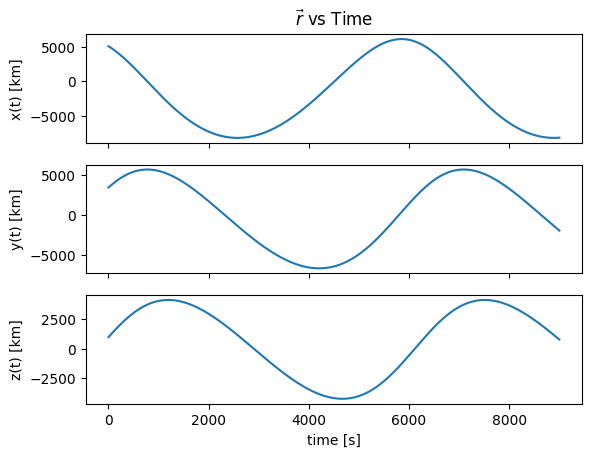

In [19]:
from scipy.optimize import fsolve
from scipy.spatial.transform import Rotation
from scipy.integrate import odeint

r0 = np.array([5.11843,
               3.431758,
               0.969722])*10**3
v0 = np.array([-4.4146087,
               5.62748695,
               4.760006])

mu = 398600.4418

def EOM(x,t):
    r = x[:3]
    a = -mu * r / np.linalg.norm( r ) ** 3
    return np.array([x[3],x[4],x[5],a[0],a[1],a[2]])

x0 = np.hstack([r0,v0])
times = np.linspace(0,3600*2.5,3601)
tol = 10**-12

x = odeint(EOM,x0,times,rtol=tol,atol=tol)
r = x[:,:3]
v = x[:,3:]

fig,axes = plt.subplots(3,sharex=True)
axes[0].set_title(r"$\vec{r}$ vs Time")
for idx in range(3):
    axes[idx].plot(times,r[:,idx])
axes[0].set_ylabel("x(t) [km]")
axes[1].set_ylabel("y(t) [km]")
axes[2].set_ylabel("z(t) [km]")
axes[2].set_xlabel("time [s]")
plt.show()

#### 2. The 3D orbit of the satellite, i.e., plot X(t), Y (t), and Z(t) in the inertial frame.

##### Solution:

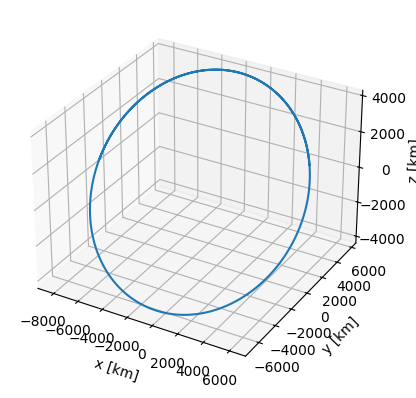

In [20]:
plt.figure()
ax = plt.axes(projection="3d")
ax.plot(r[:,0],r[:,1],r[:,2])
ax.set_xlabel("x [km]")
ax.set_ylabel("y [km]")
ax.set_zlabel("z [km]")
plt.show()